In [128]:
# Ignore Warnings.
import warnings
warnings.filterwarnings("ignore")

In [165]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st
import seaborn as sns
from matplotlib import cm
import matplotlib.ticker as ticker
import gmaps
from urllib.request import urlopen
import requests
import re

# Import the data
Hurricane_df = pd.read_csv('new_data_atlantic.csv')
Hurricane_df.head()


,Unnamed: 0,ID,Name,Date,Time,Status,Latitude,Longitude,Maximum Wind
0,0,AL011851,UNNAMED,1851-06-25,0,HU,28.0N,94.8W,80
1,1,AL011851,UNNAMED,1851-06-25,600,HU,28.0N,95.4W,80
2,2,AL011851,UNNAMED,1851-06-25,1200,HU,28.0N,96.0W,80
3,3,AL011851,UNNAMED,1851-06-25,1800,HU,28.1N,96.5W,80
4,4,AL011851,UNNAMED,1851-06-25,2100,HU,28.2N,96.8W,80


In [166]:
Hurricane_df['Month'] = pd.DatetimeIndex(Hurricane_df['Date']).month_name()
Hurricane_df['Year'] = pd.DatetimeIndex(Hurricane_df['Date']).year
HU_df = Hurricane_df.loc[Hurricane_df["Status"] == " HU",:]
TS_df= Hurricane_df.loc[Hurricane_df["Status"] == " TS",:]
del(HU_df['Date'])
HU_df

,Unnamed: 0,ID,Name,Time,Status,Latitude,Longitude,Maximum Wind,Month,Year
0,0,AL011851,UNNAMED,0,HU,28.0N,94.8W,80,June,1851
1,1,AL011851,UNNAMED,600,HU,28.0N,95.4W,80,June,1851
2,2,AL011851,UNNAMED,1200,HU,28.0N,96.0W,80,June,1851
3,3,AL011851,UNNAMED,1800,HU,28.1N,96.5W,80,June,1851
4,4,AL011851,UNNAMED,2100,HU,28.2N,96.8W,80,June,1851
...,...,...,...,...,...,...,...,...,...,...
49053,49053,AL112015,JOAQUIN,600,HU,40.3N,51.5W,65,October,2015
49094,49094,AL122015,KATE,0,HU,33.1N,71.3W,65,November,2015
49095,49095,AL122015,KATE,600,HU,35.2N,67.6W,70,November,2015
49096,49096,AL122015,KATE,1200,HU,36.2N,62.5W,75,November,2015


In [167]:
HU_df = HU_df[['ID', 'Name', 'Month', 'Year', 'Time', 'Status', 'Latitude', 'Longitude', 'Maximum Wind']]
HU_df_by_ID = HU_df.groupby(['ID'])
HU_df_by_ID_maxWind = HU_df_by_ID.max()
HU_df_by_ID_maxWind.to_csv("grpdID.csv")

In [168]:
hurr_cat_bins = [0, 74, 95, 110, 129, 156, 300]

# Create the names for the four bins
hurr_cat = ["TS", "1", "2", "3", "4", "5"]
HU_df_by_ID_maxWind['Cat'] = pd.cut(HU_df_by_ID_maxWind['Maximum Wind'], hurr_cat_bins, labels=hurr_cat)
HU_df_by_ID_maxWind.to_csv("groupedIDwithBin.csv")
HU_df_by_ID_maxWind.head()

,Name,Month,Year,Time,Status,Latitude,Longitude,Maximum Wind,Cat
ID,,,,,,,,,
AL011851,UNNAMED,June,1851,2100,HU,28.2N,97.0W,80,1
AL011852,UNNAMED,August,1852,1800,HU,31.2N,88.6W,100,2
AL011854,UNNAMED,June,1854,1800,HU,26.2N,97.0W,70,TS
AL011855,UNNAMED,August,1855,1200,HU,22.2N,98.0W,90,1
AL011856,UNNAMED,August,1856,1800,HU,30.0N,91.8W,130,4


In [169]:
# Groupby Month
hu_monthly = HU_df_by_ID_maxWind.groupby(['Month', 'Cat']).count()
hu_monthly = hu_monthly.replace(np.NaN, 0)
hu_monthly.head()

Name  Year  Time  Status  Latitude  Longitude  Maximum Wind
Month  Cat                                                             
August TS   42.0  42.0  42.0    42.0      42.0       42.0          42.0
       1    72.0  72.0  72.0    72.0      72.0       72.0          72.0
       2    45.0  45.0  45.0    45.0      45.0       45.0          45.0
       3    15.0  15.0  15.0    15.0      15.0       15.0          15.0
       4     9.0   9.0   9.0     9.0       9.0        9.0           9.0

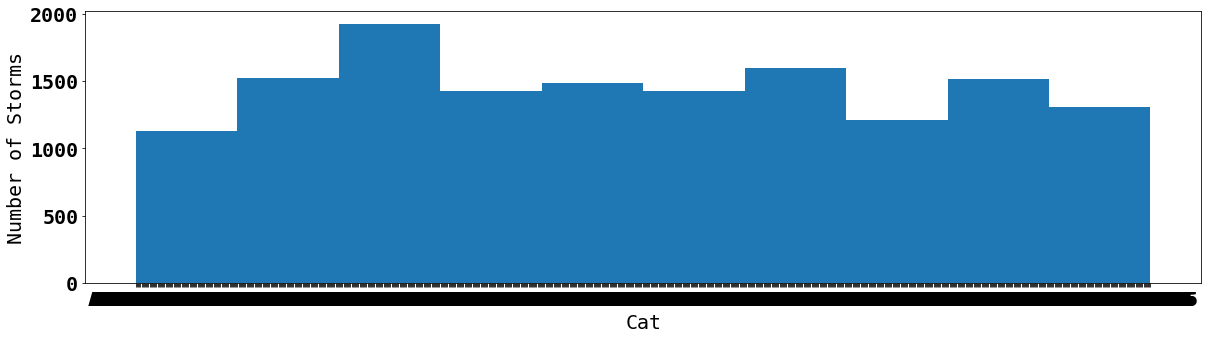

In [170]:
# Plot histogram
plt.hist(HU_df['ID'])
plt.xlabel('Cat')
plt.ylabel('Number of Storms')
plt.show()

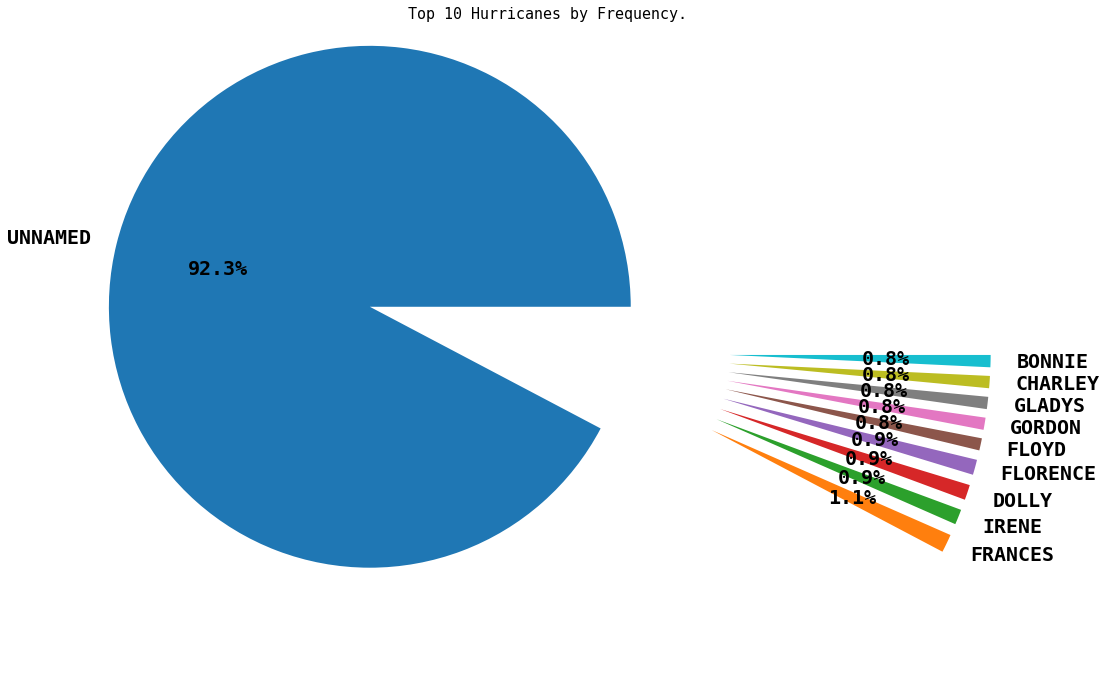

In [171]:
# Find the top ten hurricanes which have occured the maximum number of times.
lst = [x.strip() for x in HU_df_by_ID_maxWind.groupby('Name').count().sort_values(by = 'Year' , ascending = False).index[:10]]
val = HU_df_by_ID_maxWind.groupby('Name').count().sort_values(by = 'Year' , ascending = False)[:10]['Year'].values
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
fig , ax = plt.subplots()
fig.set_size_inches(12,12)
ax.pie(  labels = lst , x = val , autopct='%.1f%%' , explode = [0.7 for x in range(10)])
plt.title('Top 10 Hurricanes by Frequency.' , fontsize = 15)
plt.show()

In [ ]:
# This pie chart shows the 10 top storms based on the category
# 

In [172]:
hu_yearly = HU_df_by_ID_maxWind.groupby(['Year', 'Cat']).count()
hu_yearly = hu_yearly.replace(np.NaN, 0)
hu_yearly.head()

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind
Year Cat                                                              
1851 TS    0.0    0.0   0.0     0.0       0.0        0.0           0.0
     1     2.0    2.0   2.0     2.0       2.0        2.0           2.0
     2     1.0    1.0   1.0     1.0       1.0        1.0           1.0
     3     0.0    0.0   0.0     0.0       0.0        0.0           0.0
     4     0.0    0.0   0.0     0.0       0.0        0.0           0.0

In [173]:
hu_yearly = HU_df_by_ID_maxWind.groupby(['Year', 'ID']).count()
hu_yearly = hu_yearly.replace(np.NaN, 0)
hu_yearly.head()

Name  Month  Time  Status  Latitude  Longitude  Maximum Wind  \
Year ID                                                                       
1851 AL011851     1      1     1       1         1          1             1   
     AL021851     1      1     1       1         1          1             1   
     AL041851     1      1     1       1         1          1             1   
1852 AL011852     1      1     1       1         1          1             1   
     AL021852     1      1     1       1         1          1             1   

               Cat  
Year ID             
1851 AL011851    1  
     AL021851    1  
     AL041851    1  
1852 AL011852    1  
     AL021852    1

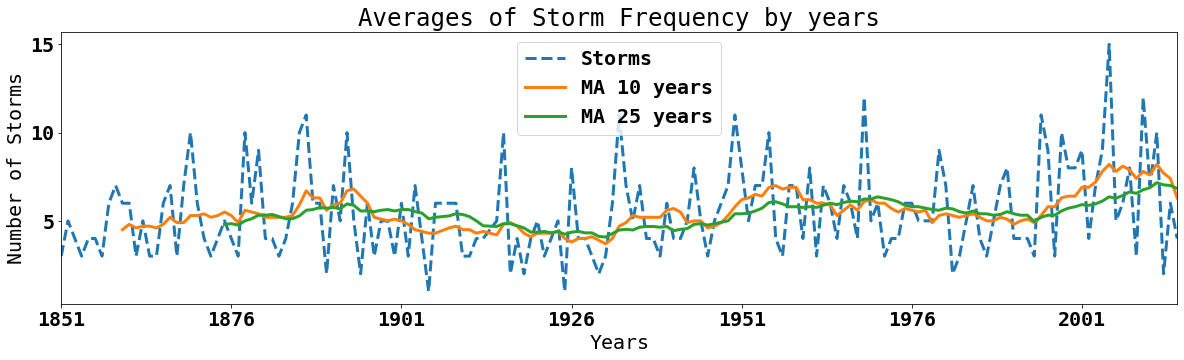

In [174]:
# Hurricanes at Regular intervals (Periodic)
# Moving & Count averages of storm frequency by year 

hu_yearly = HU_df.groupby('Year')['ID'].unique().to_frame().reset_index()
hu_yearly['Storms'] = hu_yearly['ID'].str.len()
hu_yearly['Year'] = hu_yearly['Year'].astype('int')
hu_yearly['Storms'] = hu_yearly['Storms'].astype('int')
plt.rcParams["figure.figsize"] =(20,5)
hu_yearly.plot(x='Year', y='Storms',linewidth=3,linestyle = 'dashed')
plt.xticks(np.arange(hu_yearly.Year.min(),hu_yearly.Year.max(),25))
plt.title('Averages of Storm Frequency by years')
plt.ylabel('Number of Storms')
plt.plot(hu_yearly['Year'],hu_yearly['Storms'].rolling(10).mean(),label= 'MA 10 years', linewidth=3)
plt.plot(hu_yearly['Year'],hu_yearly['Storms'].rolling(25).mean(),label= 'MA 25 years', linewidth=3)
plt.ylabel('Number of Storms')
plt.xlabel('Years')
plt.legend()

In [175]:
# The plot above shows there is some kind of gradual increase in the severity and occurences of hurricanes/storms over the decades.
# Also observd from the plot is an average of 10 storms occuring each hurricane season.
# A moving average of storms in 10-25 timescale shows a multidecadal oscillation pattern in the north atlantic ocean

# Following this pattern, is climate change the cause for the increase in occurence and severity of the storms?

In [176]:
def LandFallingStormTracks(HU_df):
    m = MapTemplate("Atlantic Hurricane : Landfalling Historical Storms (1851-2014)")
    LandfallStorms = HU_df[HU_df.RecIdentifier == " L"]
    LandfallStorms_Unique = LandfallStorms.ID.unique()
    print ('Total number of Landfalling Storms = ', len(LandfallStorms_Unique))
    for id in LandfallStorms_Unique:
      temp_db = HU_df[HU_df.ID == id]
      lat_storm = temp_db.Lat.values
      lon_storm = temp_db.Lon.values
      x1, y1 = m(lon_storm,lat_storm)
      plt.plot(x1,y1,'g-',linewidth=0.5)
      plt.title('Total Number of Storms = '+ str(len(LandfallStorms_Unique)))

In [ ]:
#m1 = MapTemplate("Atlantic Hurricane Historical Storms (1851-2014)")
UniqueStorms = HU_df.ID.unique()
for id, track in HU_df.groupby('ID'):
    lat_storm = track.Lat.values
    lon_storm = track.Lon.values
    x1, y1 = m1(lon_storm,lat_storm)
    plt.plot(x1,y1,'r-',linewidth=0.5)
    plt.title('Total Number of Storms = '+ str(len(UniqueStorms)))